In [162]:
import numpy as nm  
import matplotlib.pyplot as mtp  
import pandas as pd  
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score


In [163]:
#importing datasets  
df_for_svm= pd.read_csv('sorted_data_for_test.csv')
df_for_svm.head()

,FIPS,Province_State,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio,Year
0,12-31-2020,Tamil Nadu,01-01-2021 05:23,11.006091,78.400624,817077,12109,796353,8615.0,"Tamil Nadu, India",1049.670736,1.481990,2020
1,12-30-2020,Tamil Nadu,31-12-2020 05:22,11.006091,78.400624,817077,12109,796353,8615.0,"Tamil Nadu, India",1049.670736,1.481990,2020
2,12-29-2020,Tamil Nadu,30-12-2020 05:22,11.006091,78.400624,816132,12092,795293,8747.0,"Tamil Nadu, India",1048.456727,1.481623,2020
3,12-28-2020,Tamil Nadu,29-12-2020 05:22,11.006091,78.400624,815175,12080,794228,8867.0,"Tamil Nadu, India",1047.227302,1.481890,2020
4,12-27-2020,Tamil Nadu,28-12-2020 05:22,11.006091,78.400624,814170,12069,793154,8947.0,"Tamil Nadu, India",1045.936213,1.482369,2020


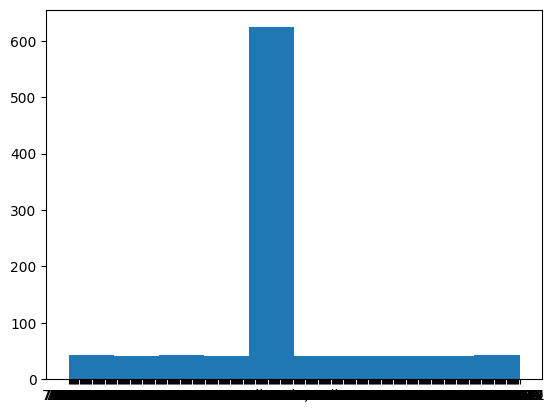

In [164]:
plt.hist(df_for_svm['Recovered'])
plt.show()

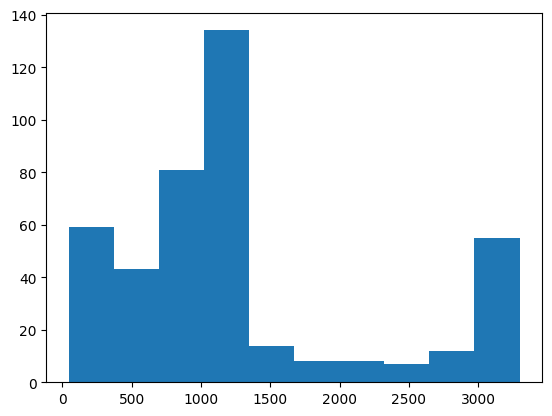

In [165]:
plt.hist(df_for_svm['Incident_Rate'])
plt.show()

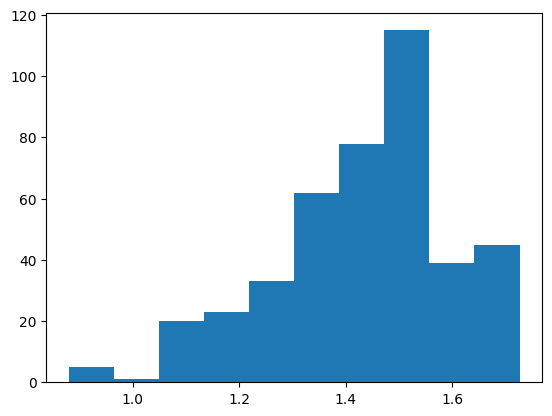

In [166]:
plt.hist(df_for_svm['Case_Fatality_Ratio'])
plt.show()

In [167]:
df_for_svm['Recovered'] = df_for_svm['Recovered'].apply(pd.to_numeric, errors='coerce')

In [168]:
updated_df_svm = df_for_svm

In [169]:
updated_df_svm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FIPS                 1003 non-null   object 
 1   Province_State       1003 non-null   object 
 2   Last_Update          1003 non-null   object 
 3   Lat                  1003 non-null   float64
 4   Long_                1003 non-null   float64
 5   Confirmed            1003 non-null   int64  
 6   Deaths               1003 non-null   int64  
 7   Recovered            421 non-null    float64
 8   Active               1003 non-null   float64
 9   Combined_Key         1003 non-null   object 
 10  Incident_Rate        421 non-null    float64
 11  Case_Fatality_Ratio  421 non-null    float64
 12  Year                 1003 non-null   int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 102.0+ KB


In [170]:
updated_df_svm['Recovered']=updated_df_svm['Recovered'].fillna(updated_df_svm['Recovered'].median())
updated_df_svm['Incident_Rate']=updated_df_svm['Incident_Rate'].fillna(updated_df_svm['Incident_Rate'].median())
updated_df_svm['Case_Fatality_Ratio']=updated_df_svm['Case_Fatality_Ratio'].fillna(updated_df_svm['Case_Fatality_Ratio'].median())

In [171]:
updated_df_svm.isnull().sum()

FIPS                   0
Province_State         0
Last_Update            0
Lat                    0
Long_                  0
Confirmed              0
Deaths                 0
Recovered              0
Active                 0
Combined_Key           0
Incident_Rate          0
Case_Fatality_Ratio    0
Year                   0
dtype: int64

In [172]:
updated_df_svm['abs_diffActive'] = updated_df_svm['Active'].diff().abs()
updated_df_svm['abs_diffConfirmed'] = updated_df_svm['Confirmed'].diff().abs()
updated_df_svm['abs_diffDeaths'] = updated_df_svm['Deaths'].diff().abs()
updated_df_svm['abs_diffRecovered'] = updated_df_svm['Recovered'].diff().abs()

In [173]:
updated_df_svm.head()

,FIPS,Province_State,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio,Year,abs_diffActive,abs_diffConfirmed,abs_diffDeaths,abs_diffRecovered
0,12-31-2020,Tamil Nadu,01-01-2021 05:23,11.006091,78.400624,817077,12109,796353.0,8615.0,"Tamil Nadu, India",1049.670736,1.481990,2020,NaN,NaN,NaN,NaN
1,12-30-2020,Tamil Nadu,31-12-2020 05:22,11.006091,78.400624,817077,12109,796353.0,8615.0,"Tamil Nadu, India",1049.670736,1.481990,2020,0.0,0.0,0.0,0.0
2,12-29-2020,Tamil Nadu,30-12-2020 05:22,11.006091,78.400624,816132,12092,795293.0,8747.0,"Tamil Nadu, India",1048.456727,1.481623,2020,132.0,945.0,17.0,1060.0
3,12-28-2020,Tamil Nadu,29-12-2020 05:22,11.006091,78.400624,815175,12080,794228.0,8867.0,"Tamil Nadu, India",1047.227302,1.481890,2020,120.0,957.0,12.0,1065.0
4,12-27-2020,Tamil Nadu,28-12-2020 05:22,11.006091,78.400624,814170,12069,793154.0,8947.0,"Tamil Nadu, India",1045.936213,1.482369,2020,80.0,1005.0,11.0,1074.0


In [174]:
updated_df_svm = updated_df_svm.dropna().reset_index(drop=True)

In [175]:
updated_df_svm.head()

,FIPS,Province_State,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio,Year,abs_diffActive,abs_diffConfirmed,abs_diffDeaths,abs_diffRecovered
0,12-30-2020,Tamil Nadu,31-12-2020 05:22,11.006091,78.400624,817077,12109,796353.0,8615.0,"Tamil Nadu, India",1049.670736,1.481990,2020,0.0,0.0,0.0,0.0
1,12-29-2020,Tamil Nadu,30-12-2020 05:22,11.006091,78.400624,816132,12092,795293.0,8747.0,"Tamil Nadu, India",1048.456727,1.481623,2020,132.0,945.0,17.0,1060.0
2,12-28-2020,Tamil Nadu,29-12-2020 05:22,11.006091,78.400624,815175,12080,794228.0,8867.0,"Tamil Nadu, India",1047.227302,1.481890,2020,120.0,957.0,12.0,1065.0
3,12-27-2020,Tamil Nadu,28-12-2020 05:22,11.006091,78.400624,814170,12069,793154.0,8947.0,"Tamil Nadu, India",1045.936213,1.482369,2020,80.0,1005.0,11.0,1074.0
4,12-26-2020,Tamil Nadu,27-12-2020 05:22,11.006091,78.400624,813161,12059,792063.0,9039.0,"Tamil Nadu, India",1044.639985,1.482978,2020,92.0,1009.0,10.0,1091.0


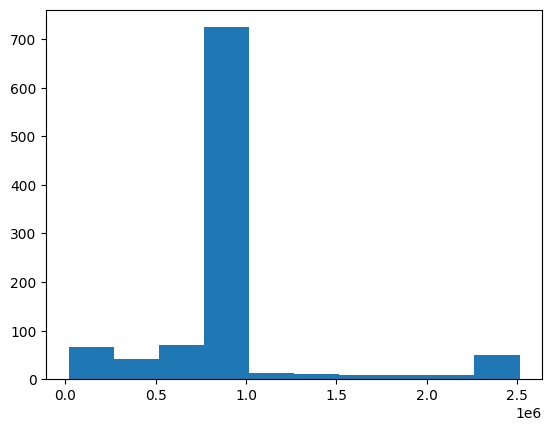

In [176]:
plt.hist(updated_df_svm['Recovered'])
plt.show() 

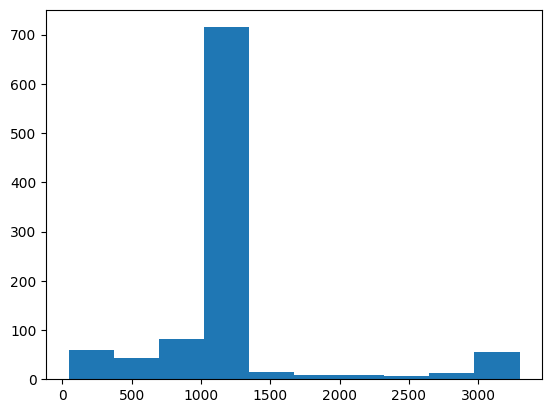

In [177]:
plt.hist(updated_df_svm['Incident_Rate'])
plt.show() 

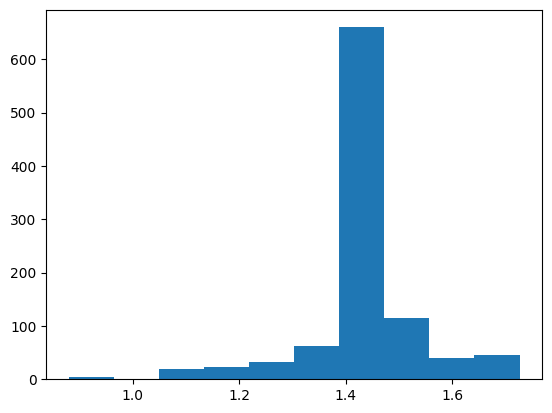

In [178]:
plt.hist(updated_df_svm['Case_Fatality_Ratio'])
plt.show() 

In [179]:
from sklearn import preprocessing
from sklearn import utils

#Extracting Independent and dependent Variable  
x= df_for_svm[['Confirmed','Deaths','Recovered','Incident_Rate','Case_Fatality_Ratio']]
y= df_for_svm['Active']

# x = updated_df[['abs_diffConfirmed', 'abs_diffDeaths', 'abs_diffRecovered','Incident_Rate','Case_Fatality_Ratio']]
# y = updated_df['abs_diffActive'] 

#y= y.apply(lambda x: 0 if x >= 1 else 1)
# y = df['Case_Fatality_Ratio']
# # # set the number of bins to 2
# # n_bins = 2

# # # use pandas cut function to convert continuous values to 0s and 1s
# # y = pd.cut(y, n_bins, labels=[0, 1])
# y= y.apply(lambda x: 0 if x >= 1 else 1)


# y.tail()

In [180]:
x.head()

,Confirmed,Deaths,Recovered,Incident_Rate,Case_Fatality_Ratio
0,817077,12109,796353.0,1049.670736,1.481990
1,817077,12109,796353.0,1049.670736,1.481990
2,816132,12092,795293.0,1048.456727,1.481623
3,815175,12080,794228.0,1047.227302,1.481890
4,814170,12069,793154.0,1045.936213,1.482369


In [181]:
y.head()

0    8615.0
1    8615.0
2    8747.0
3    8867.0
4    8947.0
Name: Active, dtype: float64

In [182]:
# Splitting the dataset into training and test set.  
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.05, random_state=42)  


In [183]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

In [479]:
# Create SVR model
svr = SVR(kernel='poly', C=100,epsilon=0.4) 

In [480]:
# Fit the model on the training data
svr.fit(X_train_scaled, y_train)

SVR(C=100, epsilon=0.4, kernel='poly')

In [481]:
# Make predictions on the test data
y_train_pred = svr.predict(X_train_scaled)
y_test_pred = svr.predict(X_test_scaled)


In [482]:
# Calculating accuracy metrics for the training set
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
accuracy_train = (train_r2 + 1) / 2 * 100

In [483]:
print("Train Mean Squared Error:", train_mse)
print("Train R-squared:", train_r2)
print(accuracy_train)

Train Mean Squared Error: 1145158220.6808498
Train R-squared: 0.5368162531279046
76.84081265639523


In [484]:
# Calculating accuracy metrics for the testing set
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
accuracy_test = (test_r2 + 1) / 2 * 100

In [485]:
print("Train Mean Squared Error:", train_mse)
print("Train R-squared:", train_r2)
print(accuracy_test)

Train Mean Squared Error: 1145158220.6808498
Train R-squared: 0.5368162531279046
74.74338935164636


In [486]:
print("SVR train accuracy kernel='poly': {:.2f}%".format(accuracy_train))
print("SVR accuracy kernel='poly': {:.2f}%".format(accuracy_test))

SVR train accuracy kernel='poly': 76.84%
SVR accuracy kernel='poly': 74.74%


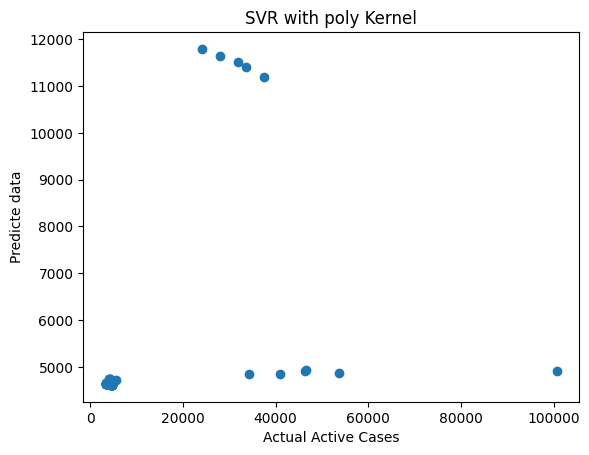

In [397]:
plt.scatter(y_test, y_test_pred)
plt.xlabel('Actual Active Cases')
plt.ylabel('Predicte data')
plt.title('SVR with poly Kernel')
plt.show()

# ---------SVR rbf kernel------ #

In [502]:
# Create and fit the SVR model with RBF kernel
model = SVR(kernel='rbf')
model.fit(X_train_scaled, y_train)

SVR()

In [503]:
# Predict the target variable for the test set
y_train_predRBF = model.predict(X_train_scaled)
y_test_predRBF = model.predict(X_test_scaled)

In [504]:
# Calculating accuracy metrics for the training set
train_mse_rbf = mean_squared_error(y_train, y_train_predRBF)
train_r2_rbf = r2_score(y_train, y_train_predRBF)
accuracy_train_rbf = (train_r2_rbf + 1) / 2 * 100

In [505]:
mse = mean_squared_error(y_test, y_test_predRBF)
r2 = r2_score(y_test, y_test_predRBF)

In [506]:
score_test_rbf = r2_score(y_test, y_test_predRBF)
accuracy_test_rbf = (score_test_rbf + 1) / 2 * 100
print("SVR trin accuracy: {:.2f}%".format(accuracy_train_rbf))
print("SVR test accuracy: {:.2f}%".format(accuracy_test_rbf))

SVR trin accuracy: 42.32%
SVR test accuracy: 41.62%


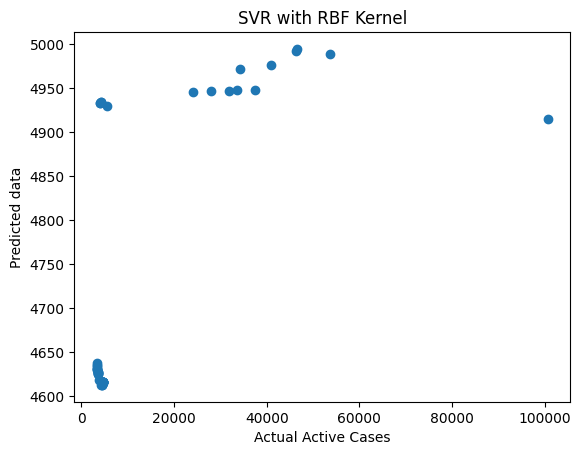

In [511]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_test_predRBF)
plt.xlabel('Actual Active Cases')
plt.ylabel('Predicted data')
plt.title('SVR with RBF Kernel')
plt.show()